In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from datasets import load_dataset

import pandas as pd

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
"""
SPOTIFY MUSIC RECOMMENDATION ENGINE
===================================
Classical Machine Learning Capstone Project

Dataset: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset
Dataset Size: 114,000 tracks across 125 genres with 21 audio features
"""

# ===================================
# IMPORT LIBRARIES
# ===================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# ===================================
# DATA LOADING AND INITIAL EXPLORATION
# ===================================



# TODO: Load the dataset

def load_data(file_path):
    """
    Load the Spotify dataset and perform initial inspection

    Args:
        file_path (str): Path to the CSV file

    Returns:
        pd.DataFrame: Loaded dataset
    """

    df = pd.read_csv(file_path)
    return df





def create_sample_data():
    """
    Create a sample Spotify-like dataset for demonstration or fallback purposes.

    This function generates synthetic track-level music data with features such as
    track metadata, audio characteristics, and genre information.

    Returns:
        pd.DataFrame: A pandas DataFrame with 1000 synthetic music track records.
    """
    np.random.seed(42)
    n_samples = 1000

    data = {
        'track_id': [f'track_{i}' for i in range(n_samples)],
        'artists': np.random.choice(['Artist A', 'Artist B', 'Artist C'], n_samples),
        'album_name': np.random.choice(['Album 1', 'Album 2', 'Album 3'], n_samples),
        'track_name': [f'Song {i}' for i in range(n_samples)],
        'popularity': np.random.randint(0, 101, n_samples),
        'duration_ms': np.random.normal(200000, 50000, n_samples),
        'explicit': np.random.choice([True, False], n_samples),
        'danceability': np.random.uniform(0, 1, n_samples),
        'energy': np.random.uniform(0, 1, n_samples),
        'key': np.random.randint(0, 12, n_samples),
        'loudness': np.random.uniform(-60, 0, n_samples),
        'mode': np.random.choice([0, 1], n_samples),
        'speechiness': np.random.uniform(0, 1, n_samples),
        'acousticness': np.random.uniform(0, 1, n_samples),
        'instrumentalness': np.random.uniform(0, 1, n_samples),
        'liveness': np.random.uniform(0, 1, n_samples),
        'valence': np.random.uniform(0, 1, n_samples),
        'tempo': np.random.uniform(60, 200, n_samples),
        'time_signature': np.random.choice([3, 4, 5], n_samples),
        'track_genre': np.random.choice(['pop', 'rock', 'hip-hop', 'jazz', 'classical'], n_samples)
    }

    return pd.DataFrame(data)


def explore_dataset(df):
    """
    Perform comprehensive dataset exploration

    Args:
        df (pd.DataFrame): The dataset to explore.

    Returns:
        pd.DataFrame: The same input DataFrame, unchanged.

    """
    print("=" * 50)
    print("DATASET OVERVIEW")
    print("=" * 50)

    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    print("\n" + "=" * 50)
    print("COLUMN INFORMATION")
    print("=" * 50)

    print(df.info())


    print("\n" + "=" * 50)
    print("FIRST FEW ROWS")
    print("=" * 50)

    print(df.head())


    print("\n" + "=" * 50)
    print("MISSING VALUES ANALYSIS")
    print("=" * 50)
    ore = df.isna().sum()
    df.dropna(inplace=True)
    missing_after = df.isna().sum()
    print(f"Missing values before: {missing_before}")
    print(f"Missing values after: {missing_after}")

    print("\n" + "=" * 50)
    print("DUPLICATE ANALYSIS")
    print("=" * 50)

    duplicate_before = df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    duplicate_after = df.duplicated().sum()
    print(f"Duplicate records before: {duplicate_before}")
    print(f"Duplicate records after: {duplicate_after}")

    print("\n" + "=" * 50)
    print("GENRE DISTRIBUTION")
    print("=" * 50)

    genre_counts = df['track_genre'].value_counts()
    print(genre_counts)

    return df

# ===================================
# EXPLORATORY DATA ANALYSIS (EDA)
# ===================================


# TODO: Implement EDA functions
def perform_eda(df):
    """
    Perform comprehensive Exploratory Data Analysis

    Args:
        df (pd.DataFrame): The music dataset to analyze.

    Returns:
        None
    """
    # Define audio features for analysis
    audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo']

    # 1. Audio Features Distribution

    for feature in audio_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.show()

    # 2. Genre Analysis

    genre_counts = df['track_genre'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title("Distribution of Genres")
    plt.xticks(rotation=45)
    plt.show()


    # 3. Correlation Analysis

    correlation_matrix = df[audio_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


    # 4. Popularity Analysis

    plt.figure(figsize=(10, 6))
    sns.histplot(df['popularity'], kde=True)
    plt.title("Distribution of Track Popularity")
    plt.show()


    # 5. Feature Statistics by Genre

    genre_stats = df.groupby('track_genre')[audio_features].describe()
    print(genre_stats)


# ===================================
# DATA PREPROCESSING
# ===================================


# TODO: Implement preprocessing functions
def preprocess_data(df):
    """
    Preprocess the dataset for machine learning

    Args:
        df (pd.DataFrame): The raw Spotify dataset.

    Returns:
        Tuple:
            - df_processed (pd.DataFrame): Cleaned and feature-enriched DataFrame.
            - feature_matrix_scaled (pd.DataFrame): Scaled numerical feature matrix for modeling or recommendation.
            - scaler (StandardScaler): Fitted scaler object for transforming future data.
            - label_encoders (dict): Dictionary of fitted LabelEncoders for encoded categorical features.

    """
    print("=" * 50)
    print("DATA PREPROCESSING")
    print("=" * 50)

    # Create a copy to avoid modifying original data

    df_processed = df.copy()
    missing_before = df_processed.isna().sum()
    df_processed.dropna(inplace=True)
    missing_after = df_processed.isna().sum()


    # 1. Handle missing values
    print("1. Handling missing values...")


    print(f"Missing values before: {missing_before}")
    print(f"Missing values after: {missing_after}")

    # 2. Handle duplicates
    print("\n2. Handling duplicates...")

    duplicate_before = df_processed.duplicated().sum()
    df_processed.drop_duplicates(inplace=True)
    duplicate_after = df_processed.duplicated().sum()


    # 3. Feature Engineering
    print("\n3. Feature Engineering...")

    # Create new features
    df_processed['duration_min'] = df_processed['duration_ms'] / 60000  # Convert to minutes
    df_processed['popularity_category'] = pd.cut(df_processed['popularity'],
                                               bins=[0, 30, 60, 100],
                                               labels=['Low', 'Medium', 'High'])

    # Create energy-valence categories
    df_processed['mood'] = 'Unknown'
    df_processed.loc[(df_processed['energy'] > 0.5) & (df_processed['valence'] > 0.5), 'mood'] = 'Happy_Energetic'
    df_processed.loc[(df_processed['energy'] > 0.5) & (df_processed['valence'] <= 0.5), 'mood'] = 'Aggressive'
    df_processed.loc[(df_processed['energy'] <= 0.5) & (df_processed['valence'] > 0.5), 'mood'] = 'Peaceful'
    df_processed.loc[(df_processed['energy'] <= 0.5) & (df_processed['valence'] <= 0.5), 'mood'] = 'Sad'

    print(f"New features created: duration_min, popularity_category, mood")

    # 4. Encode categorical variables
    print("\n4. Encoding categorical variables...")

    # Label encode categorical variables

    label_encoders = {}
    categorical_features = ['explicit', 'mode', 'key', 'time_signature', 'popularity_category', 'mood']
    for feature in categorical_features:
        le = LabelEncoder()
        df_processed[feature] = le.fit_transform(df_processed[feature])
        label_encoders[feature] = le
    df_processed['track_genre_encoded'] = df_processed['track_genre'].astype('category').cat.codes
    print(f"Categorical features encoded: {categorical_features}")
    print(f"Genre feature encoded: track_genre_encoded")
    print(df_processed.head())
    print(df_processed.info())
    print(df_processed.describe())


    # 5. Prepare feature matrix for recommendations
    print("\n5. Preparing feature matrix...")

    # Select features for recommendation system
    recommendation_features = [
        'danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness',
        'liveness', 'valence', 'tempo', 'time_signature',
        'popularity', 'duration_min', 'track_genre_encoded'
    ]

    # Create feature matrix
    feature_matrix = df_processed[recommendation_features].copy()

    # 6. Scale features
    print("\n6. Scaling features...")
    scaler = StandardScaler()
    feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    feature_matrix_scaled = pd.DataFrame(feature_matrix_scaled,
                                       columns=recommendation_features,
                                       index=df_processed.index)

    print(f"Feature matrix shape: {feature_matrix_scaled.shape}")
    print("Preprocessing completed!")

    return df_processed, feature_matrix_scaled, scaler, label_encoders

# ===================================
# CONTENT-BASED RECOMMENDATION SYSTEM
# ===================================


class ContentBasedRecommender:
    """
    Content-Based Music Recommendation System
    Uses audio features to find similar songs
    """

    def __init__(self, df, feature_matrix, scaler):
        self.df = df
        self.feature_matrix = feature_matrix
        self.scaler = scaler
        self.similarity_matrix = None

    def calculate_similarity(self, method='cosine'):
        """
        Calculate similarity matrix between songs
        """
        print(f"Calculating {method} similarity matrix...")

        if method == 'cosine':

            self.similarity_matrix = cosine_similarity(self.feature_matrix)
            print(f"Similarity matrix calculated: {self.similarity_matrix.shape}")
            return self.similarity_matrix



        elif method == 'euclidean':
            # Convert distance to similarity (inverse relationship)

            self.similarity_matrix = 1 / (1 + euclidean_distances(self.feature_matrix))
            print(f"Similarity matrix calculated: {self.similarity_matrix.shape}")
            return self.similarity_matrix
        else:
            raise ValueError("Method must be 'cosine' or 'euclidean'")

        print(f"Similarity matrix calculated: {self.similarity_matrix.shape}")

    def recommend_songs(self, song_index, n_recommendations=10):
        """
        Recommend similar songs based on audio features (on-demand).

        Args:
            song_index (int): Index of the reference song in the dataframe.
            n_recommendations (int): Number of recommendations to return.
        """
        if song_index >= len(self.df):
            raise ValueError(f"Song index {song_index} is out of range for dataframe of length {len(self.df)}")

        # Get feature vector for the given song

        query_vector = self.feature_matrix.iloc[song_index].values.reshape(1, -1)
        print(f"Query vector shape: {query_vector.shape}")


        # Compute similarity with all other songs

        similarity_scores = cosine_similarity(query_vector, self.feature_matrix)[0]
        print(f"Similarity scores shape: {similarity_scores.shape}")


        # Get top similar songs (excluding the song itself)

        similar_indices = np.argsort(similarity_scores)[::-1][1:n_recommendations+1]
        print(f"Top similar indices: {similar_indices}")
        print(f"Top similar songs: {self.df.iloc[similar_indices]['track_name']}")


        # Build recommendations
        recommendations = self.df.iloc[similar_indices].copy()
        recommendations['similarity_score'] = similarity_scores[similar_indices]

        # Reference song info
        reference_song = self.df.iloc[song_index]
        print(f"Reference Song: {reference_song['track_name']} by {reference_song['artists']}")
        print(f"Genre: {reference_song['track_genre']} |  Popularity: {reference_song['popularity']}")
        print("\nRecommendations:")
        print("-" * 80)

        return recommendations[['track_name', 'artists', 'track_genre', 'popularity', 'similarity_score']]



    def recommend_by_features(self, target_features, n_recommendations=10):
        """
        Recommend songs based on target audio features

        Args:
            target_features (dict): Target audio feature values
            n_recommendations (int): Number of recommendations
        """
        # Create feature vector for target
        feature_vector = np.zeros(len(self.feature_matrix.columns))

        for i, feature in enumerate(self.feature_matrix.columns):
            if feature in target_features:
                feature_vector[i] = target_features[feature]

        # Scale the feature vector
        feature_vector = feature_vector.reshape(1, -1)

        # Calculate similarity with all songs
        similarities = cosine_similarity(feature_vector, self.feature_matrix)[0]

        # Get top similar songs
        similar_indices = np.argsort(similarities)[::-1][:n_recommendations]

        recommendations = self.df.iloc[similar_indices].copy()
        recommendations['similarity_score'] = similarities[similar_indices]

        return recommendations[['track_name', 'artists', 'track_genre', 'popularity', 'similarity_score']]

# ===================================
# CLUSTERING-BASED RECOMMENDATIONS
# ===================================


class ClusterBasedRecommender:
    """
    Clustering-Based Recommendation System
    """

    def __init__(self, df, feature_matrix):
        self.df = df
        self.feature_matrix = feature_matrix
        self.clusters = None
        self.cluster_model = None
        self.pca_components = None

    def apply_kmeans(self, n_clusters=50):
        """
        Apply K-Means clustering to the dataset
        """
        print(f"Applying K-Means clustering with {n_clusters} clusters...")


        self.cluster_model = KMeans(n_clusters=n_clusters)
        self.clusters = self.cluster_model.fit_predict(self.feature_matrix)
        df_clustered = self.df.copy()
        df_clustered['cluster'] = self.clusters

        return df_clustered

    def apply_dbscan(self, eps=0.5, min_samples=5):
        """
        Apply DBSCAN clustering to the dataset
        """
        print(f"Applying DBSCAN clustering (eps={eps}, min_samples={min_samples})...")


        self.cluster_model = DBSCAN(eps=eps, min_samples=min_samples)
        self.clusters = self.cluster_model.fit_predict(self.feature_matrix)
        n_clusters = len(set(self.clusters)) - (1 if -1 in self.clusters else 0)
        n_noise = list(self.clusters).count(-1)
        df_clustered = self.df.copy()
        df_clustered['cluster'] = self.clusters
        print(df_clustered.head())


        print(f"DBSCAN clustering completed")
        print(f"Number of clusters: {n_clusters}")
        print(f"Number of noise points: {n_noise}")

        return self.clusters

    def visualize_clusters(self, method='pca'):
        """
        Visualize clusters using dimensionality reduction
        """
        if self.clusters is None:
            print("No clusters found. Please run clustering first.")
            return

        plt.figure(figsize=(15, 5))

        if method == 'pca':
            # PCA visualization

            pca = PCA(n_components=2)
            pca_result = pca.fit_transform(self.feature_matrix)
            plt.scatter(pca_result[:, 0], pca_result[:, 1], c=self.clusters, cmap='viridis')
            plt.title("PCA Visualization of Clusters")
            plt.xlabel("Principal Component 1")
            plt.ylabel("Principal Component 2")
            plt.colorbar(label="Cluster")
            plt.show()

        # Feature importance for clustering
        if hasattr(self.cluster_model, 'cluster_centers_'):

            feature_importances = np.mean(self.cluster_model.cluster_centers_, axis=0)
            sorted_indices = np.argsort(feature_importances)[::-1]
            plt.figure(figsize=(10, 6))
            plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices])
            plt.xticks(range(len(sorted_indices)), self.feature_matrix.columns[sorted_indices], rotation=45)
            plt.xlabel("Features")
            plt.ylabel("Importance")
            plt.title("Feature Importance for Clustering")
            plt.show()

    def recommend_from_cluster(self, song_index, n_recommendations=10):
        """
        Recommend songs from the same cluster
        """
        if self.clusters is None:
            print("No clusters found. Please run clustering first.")
            return None

        # Get the cluster of the reference song
        song_cluster = self.clusters[song_index]

        if song_cluster == -1:
            print("Reference song is in noise cluster (DBSCAN)")
            return None

        # Find all songs in the same cluster

        cluster_songs = np.where(self.clusters == song_cluster)[0]
        cluster_songs = cluster_songs[cluster_songs != song_index]
        print(f"Songs in cluster: {len(cluster_songs) + 1}")
        print(f"Songs in cluster: {self.df.iloc[cluster_songs]['track_name']}")


        # Remove the reference song itself

        cluster_songs = cluster_songs[cluster_songs != song_index]
        recommendations = self.df.iloc[cluster_songs].copy()
        recommendations['similarity_score'] = 1.0
        recommendations['cluster'] = song_cluster
        recommendations['cluster_score'] = 1.0


        if len(cluster_songs) == 0:
            print("No other songs in the same cluster")
            return None

        # Randomly sample recommendations or take top by popularity
        if len(cluster_songs) > n_recommendations:
            # Sort by popularity and take top songs

            recommendations = recommendations.sort_values('popularity', ascending=False)
            recommendations = recommendations.head(n_recommendations)
            print(f"Songs in cluster: {len(cluster_songs) + 1}")
            print(f"Songs in cluster: {recommendations['track_name']}")
            return recommendations
        else:

            print(f"Songs in cluster: {len(cluster_songs) + 1}")
            print(f"Songs in cluster: {recommendations['track_name']}")
            return recommendations

        # Display reference song info
        reference_song = self.df.iloc[song_index]
        print(f"Reference Song: {reference_song['track_name']} by {reference_song['artists']}")
        print(f"Cluster: {song_cluster}")
        print(f"Songs in cluster: {len(cluster_songs) + 1}")
        print("\nCluster-based Recommendations:")
        print("-" * 80)

        return recommendations[['track_name', 'artists', 'track_genre', 'popularity']]


Choose execution mode:
1. Full demonstration (main)
2. Quick demo

 Running Full Demonstration...
SPOTIFY MUSIC RECOMMENDATION ENGINE
Classical Machine Learning Capstone Project

STEP 1: Loading and Exploring Dataset...
DATASET OVERVIEW
Dataset Shape: (114000, 21)
Memory Usage: 49.66 MB

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  

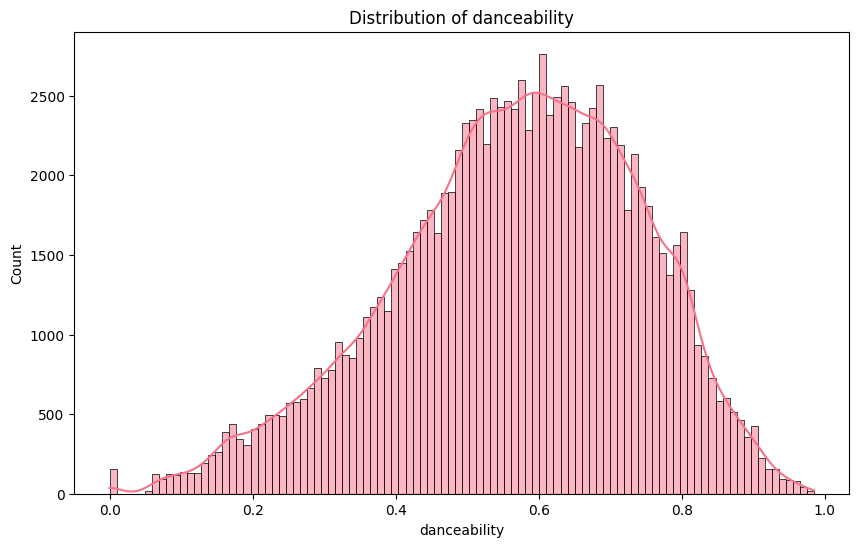

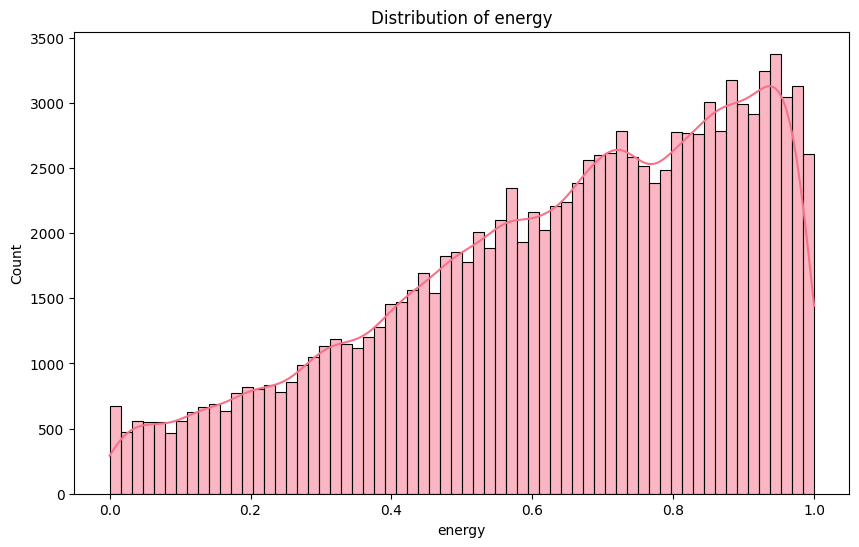

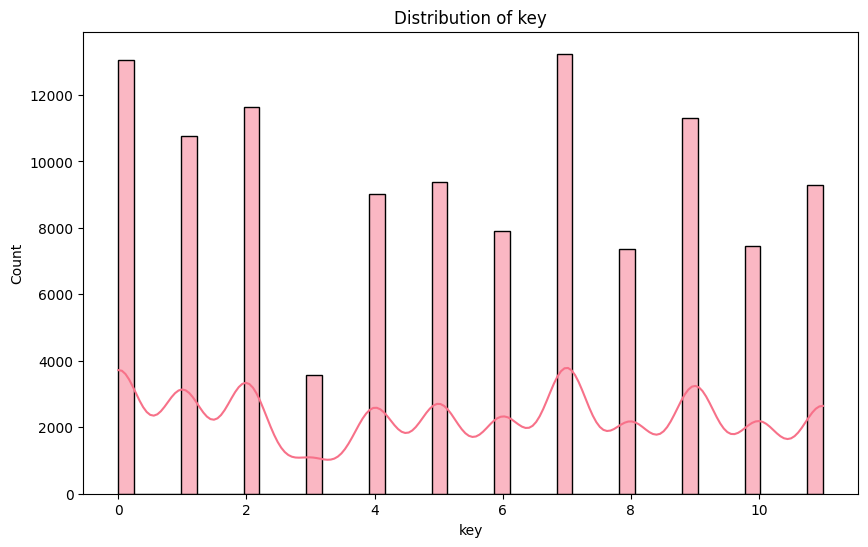

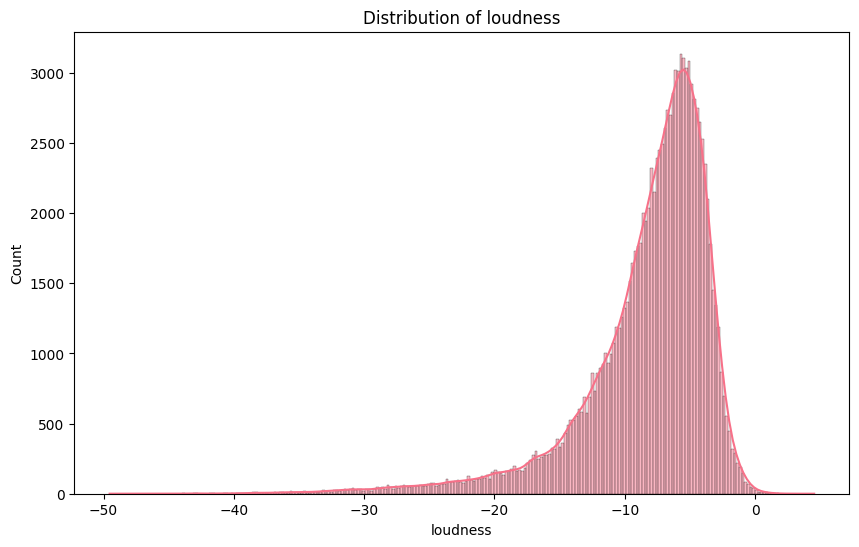

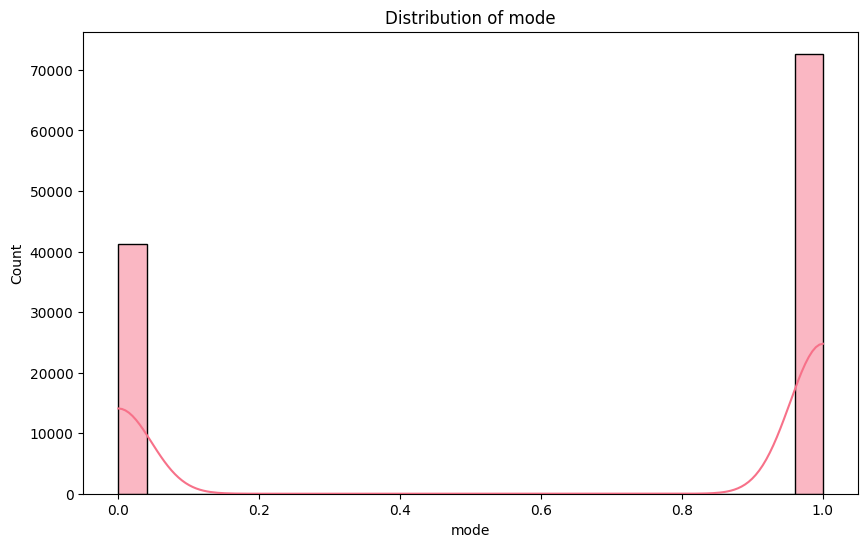

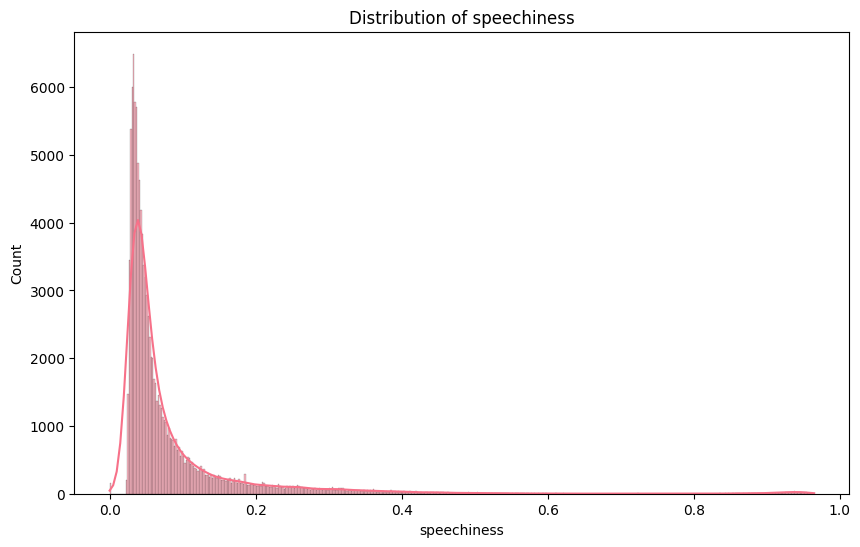

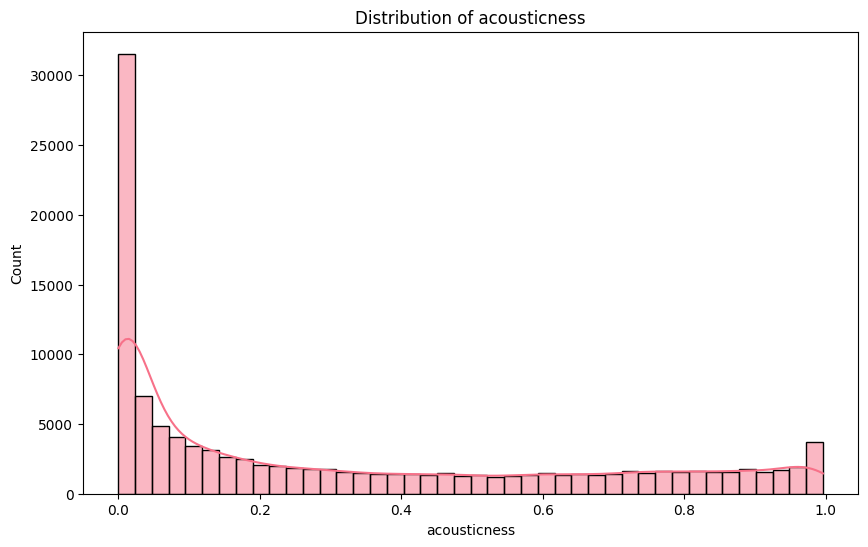

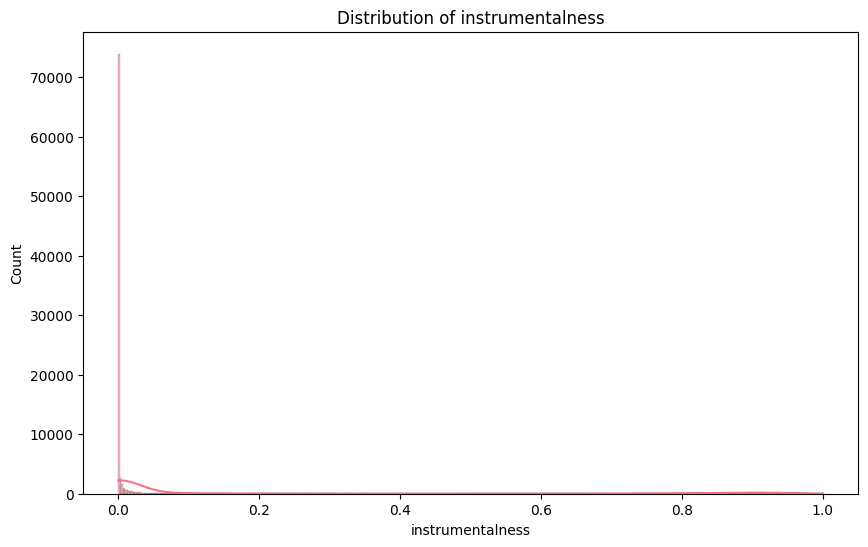

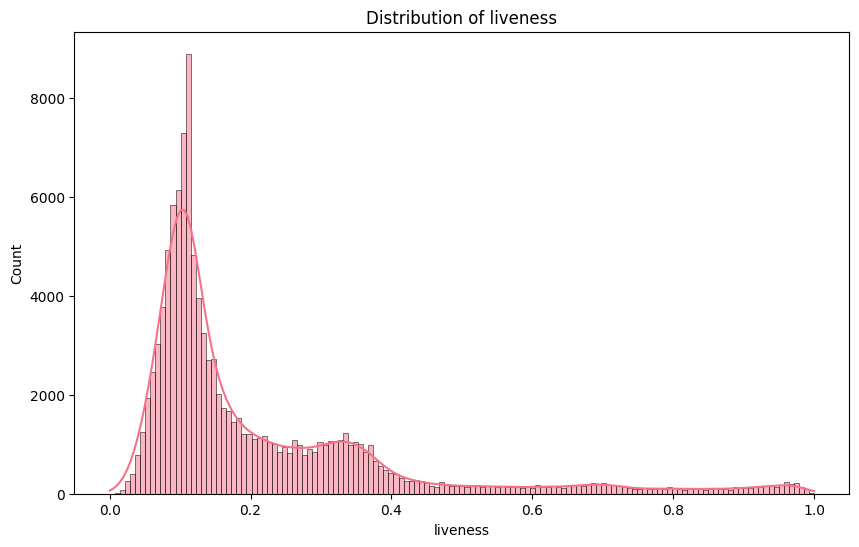

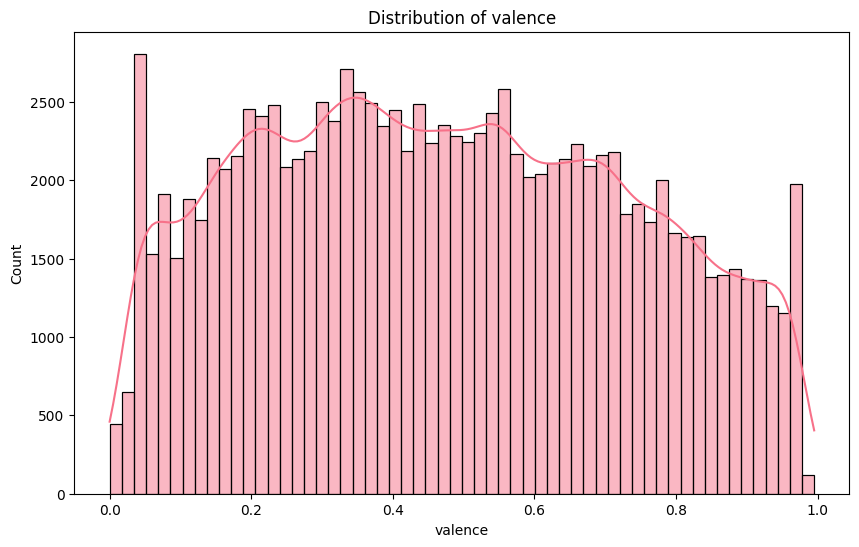

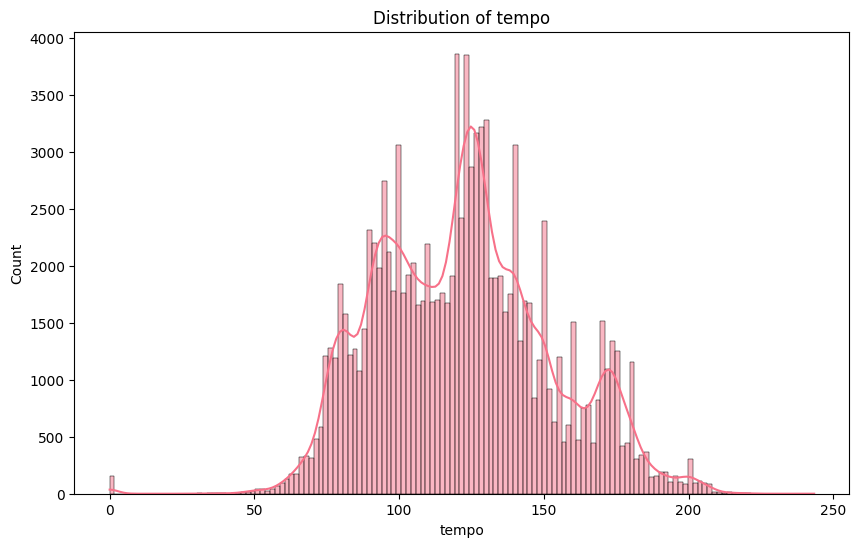

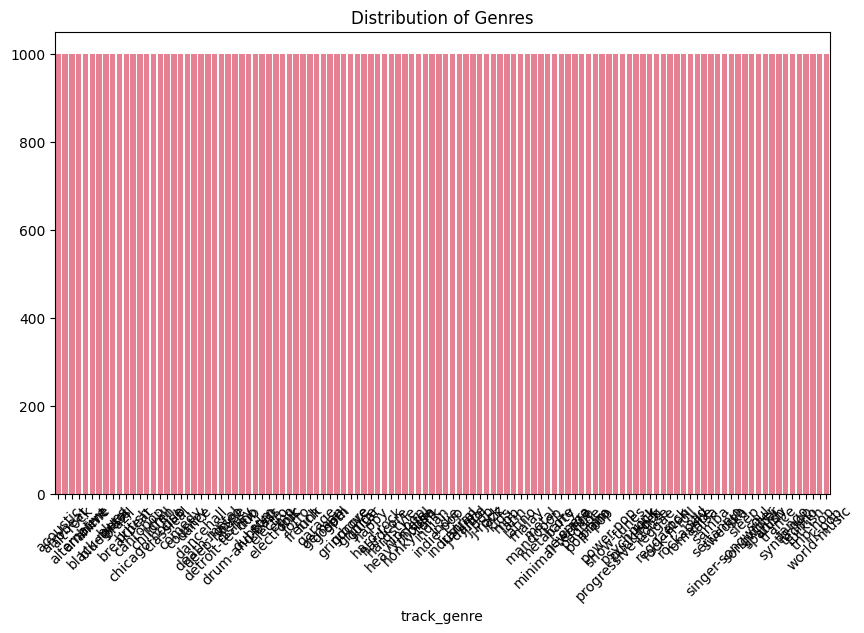

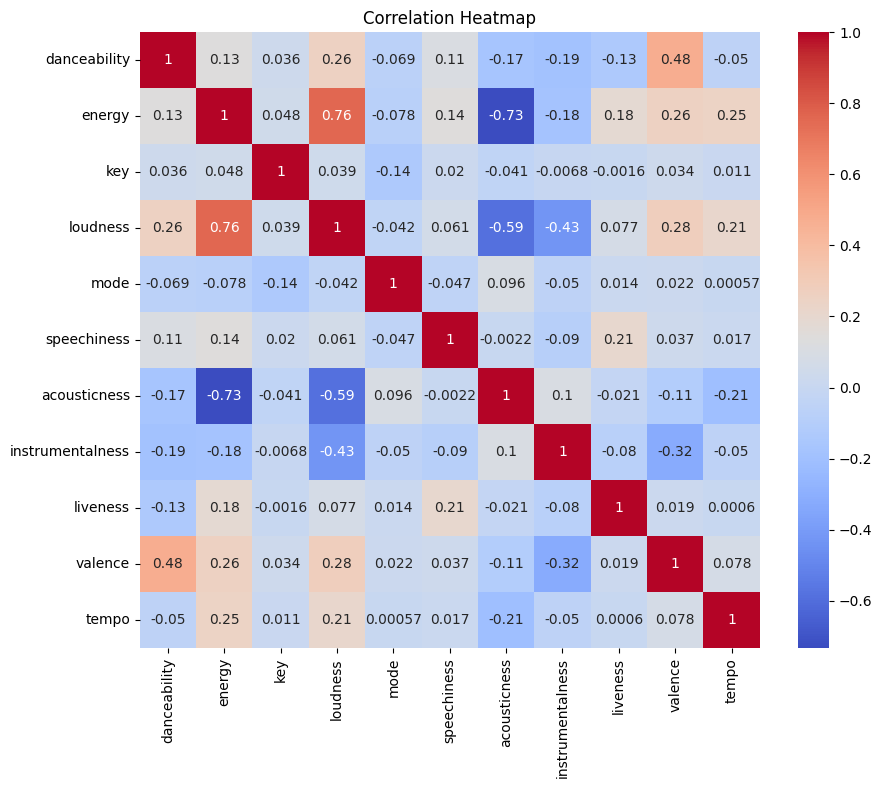

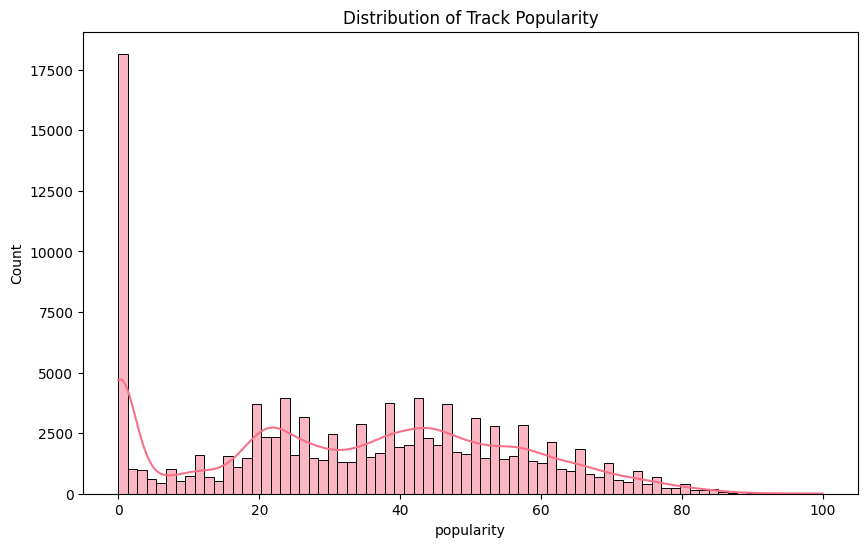

            danceability                                                       \
                   count      mean       std    min      25%     50%      75%   
track_genre                                                                     
acoustic          1000.0  0.549593  0.122203  0.213  0.46300  0.5585  0.63900   
afrobeat          1000.0  0.669580  0.123840  0.285  0.58300  0.6910  0.76225   
alt-rock          1000.0  0.534493  0.133999  0.112  0.44875  0.5425  0.63000   
alternative       1000.0  0.559927  0.147004  0.112  0.46125  0.5595  0.67100   
ambient           1000.0  0.367867  0.164653  0.000  0.23100  0.3640  0.48500   
...                  ...       ...       ...    ...      ...     ...      ...   
techno            1000.0  0.684348  0.113423  0.245  0.61100  0.6990  0.76800   
trance            1000.0  0.583409  0.122770  0.137  0.50375  0.5890  0.66425   
trip-hop          1000.0  0.634695  0.135323  0.183  0.55575  0.6435  0.72700   
turkish           1000.0  0.

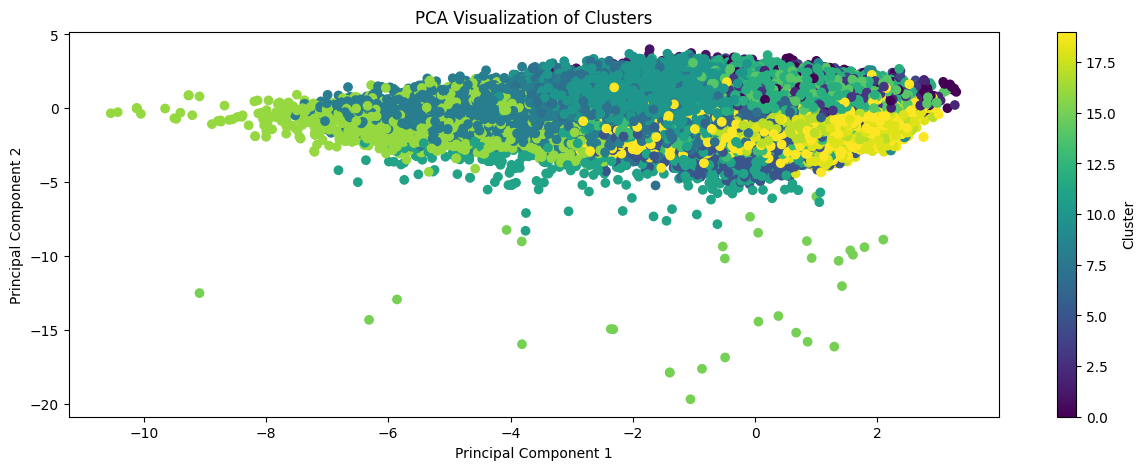

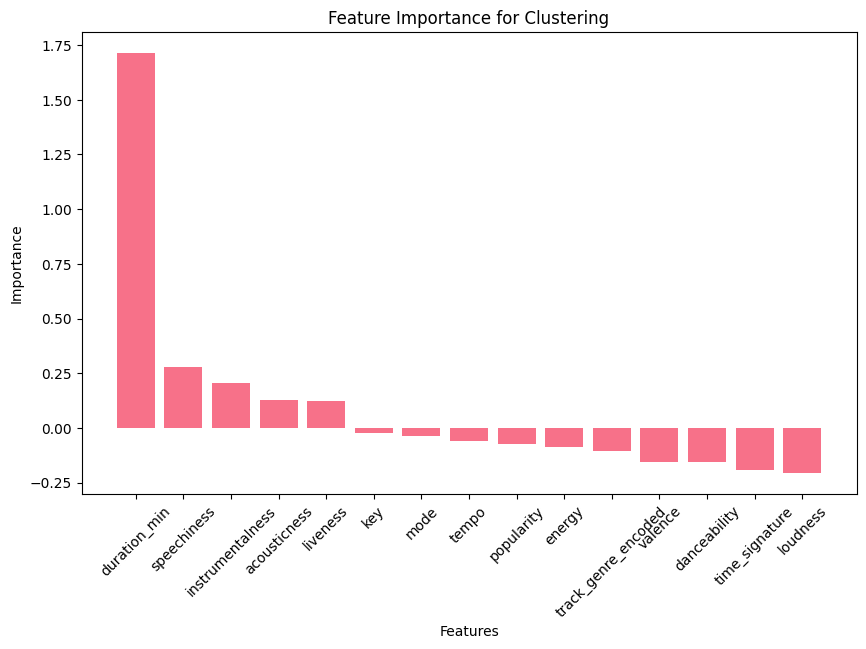


Cluster-Based Recommendation Test:
Songs in cluster: 6870
Songs in cluster: 1                 Ghost - Acoustic
2                   To Begin Again
4                          Hold On
5             Days I Will Remember
7                        I'm Yours
                   ...            
70928                          玻璃心
74019                    Telegrama
74455                          Lua
74559    Garotos II - O Outro Lado
74745                 Cabelo Loiro
Name: track_name, Length: 6869, dtype: object
Songs in cluster: 6870
Songs in cluster: 33007                Revenge
31050    everything i wanted
11003             Easy On Me
31057                  Bored
15007            double take
Name: track_name, dtype: object
       Unnamed: 0                track_id        artists           album_name           track_name  popularity  duration_ms  explicit  danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence    tempo  time_signature track_ge

In [ ]:
# ===================================
# ASSIGNMENT 6: HYBRID RECOMMENDATION SYSTEM
# ===================================

"""
ASSIGNMENT 6: Build Hybrid Recommendation System

Tasks:
1. Combine content-based and popularity-based recommendations
2. Implement weighted recommendation scoring
3. Create genre-based filtering
4. Build a comprehensive recommendation pipeline
5. Add recommendation explanation features
6. Implement diversity enhancement
7. Create user preference profiling
8. Build recommendation evaluation metrics

Deliverables:
- Hybrid recommendation system class
- Multi-criteria scoring mechanism
- Genre-based filtering system
- Comprehensive recommendation pipeline
- Recommendation explanation system
- Diversity enhancement algorithms
- Performance evaluation framework
- User interaction simulation
"""

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

class HybridRecommendationSystem:
    """
    Advanced Hybrid Recommendation System combining multiple approaches:
    - Content-based filtering (audio features similarity)
    - Popularity-based recommendations
    - Cluster-based recommendations
    - Genre-based filtering
    - Diversity enhancement
    """

    def __init__(self, df, feature_matrix, scaler):
        self.df = df.copy()
        self.feature_matrix = feature_matrix
        self.scaler = scaler
        self.content_recommender = ContentBasedRecommender(df, feature_matrix, scaler)
        self.cluster_recommender = ClusterBasedRecommender(df, feature_matrix)
        self.popularity_scaler = MinMaxScaler()
        self._prepare_popularity_scores()

    def _prepare_popularity_scores(self):
        """Prepare normalized popularity scores"""
        popularity_scores = self.df['popularity'].values.reshape(-1, 1)
        self.df['popularity_normalized'] = self.popularity_scaler.fit_transform(popularity_scores).flatten()

    def hybrid_recommend(self, song_index, n_recommendations=10,
                        content_weight=0.5, popularity_weight=0.3, cluster_weight=0.2,
                        genre_filter=None, min_popularity=0, diversity_factor=0.3):
        """
        Generate hybrid recommendations using multiple methods

        Args:
            song_index (int): Reference song index
            n_recommendations (int): Number of recommendations
            content_weight (float): Weight for content-based recommendations
            popularity_weight (float): Weight for popularity-based recommendations
            cluster_weight (float): Weight for cluster-based recommendations
            genre_filter (list): List of preferred genres (None for no filter)
            min_popularity (int): Minimum popularity threshold (0-100)
            diversity_factor (float): Factor to enhance diversity (0-1)

        Returns:
            pd.DataFrame: Hybrid recommendations with scores and explanations
        """
        print(" Generating Hybrid Recommendations...")
        print("=" * 60)

        # Validate weights
        total_weight = content_weight + popularity_weight + cluster_weight
        if abs(total_weight - 1.0) > 0.01:
            print(f"Warning: Weights don't sum to 1.0 (sum = {total_weight:.3f})")
            # Normalize weights
            content_weight /= total_weight
            popularity_weight /= total_weight
            cluster_weight /= total_weight

        reference_song = self.df.iloc[song_index]
        print(f"Reference Song: '{reference_song['track_name']}' by {reference_song['artists']}")
        print(f"Genre: {reference_song['track_genre']} | Popularity: {reference_song['popularity']}")
        print()

        # 1. Content-based recommendations

        content_scores = self._get_content_scores(song_index)
        print(f"Content-based scores: {content_scores}")

        # 2. Popularity-based scores

        popularity_scores = self.df['popularity_normalized'].values
        print(f"Popularity-based scores: {popularity_scores}")

        # 3. Cluster-based scores

        cluster_scores = self._get_cluster_scores(song_index)
        print(f"Cluster-based scores: {cluster_scores}")


        # 4. Calculate hybrid scores
        hybrid_scores = (content_weight * content_scores +
                        popularity_weight * popularity_scores +
                        cluster_weight * cluster_scores)


        # 5. Apply filters
        valid_indices = self._apply_filters(song_index, genre_filter, min_popularity)

        # 6. Apply diversity enhancement
        if diversity_factor > 0:
            hybrid_scores = self._enhance_diversity(hybrid_scores, song_index, diversity_factor)

        # 7. Get top recommendations
        filtered_scores = hybrid_scores[valid_indices]
        top_indices = valid_indices[np.argsort(filtered_scores)[::-1][:n_recommendations]]

        # 8. Create recommendations dataframe
        recommendations = self._create_recommendations_df(
            top_indices, hybrid_scores, content_scores, popularity_scores, cluster_scores,
            content_weight, popularity_weight, cluster_weight
        )

        # 9. Add explanations
        recommendations = self._add_explanations(recommendations, reference_song)

        print(f"Generated {len(recommendations)} recommendations")
        return recommendations


    def _get_content_scores(self, song_index):
        """Calculate similarity scores for one song without full matrix"""
        query_vector = self.content_recommender.feature_matrix.iloc[song_index].values.reshape(1, -1)
        similarity_scores = cosine_similarity(query_vector, self.content_recommender.feature_matrix.values)[0]
        return similarity_scores


    def _get_cluster_scores(self, song_index):
        """Calculate cluster-based scores"""
        # Apply clustering if not done
        if self.cluster_recommender.clusters is None:
            self.cluster_recommender.apply_kmeans(n_clusters=50)

        song_cluster = self.cluster_recommender.clusters[song_index]
        cluster_scores = np.zeros(len(self.df))

        # Songs in same cluster get high scores
        same_cluster_mask = self.cluster_recommender.clusters == song_cluster
        cluster_scores[same_cluster_mask] = 1.0

        # Add some noise to break ties
        cluster_scores += np.random.normal(0, 0.01, len(cluster_scores))

        return cluster_scores

    def _apply_filters(self, song_index, genre_filter, min_popularity):
        """Apply genre and popularity filters"""
        valid_mask = np.ones(len(self.df), dtype=bool)

        # Exclude the reference song itself
        valid_mask[song_index] = False

        # Genre filter
        if genre_filter is not None:
            genre_mask = self.df['track_genre'].isin(genre_filter)
            valid_mask = valid_mask & genre_mask

        # Popularity filter
        if min_popularity > 0:
            popularity_mask = self.df['popularity'] >= min_popularity
            valid_mask = valid_mask & popularity_mask

        return np.where(valid_mask)[0]

    def _enhance_diversity(self, scores, song_index, diversity_factor):
        """Enhance diversity by reducing scores of very similar songs"""
        reference_features = self.feature_matrix.iloc[song_index].values

        # Calculate feature diversity (inverse of similarity)
        similarities = cosine_similarity([reference_features], self.feature_matrix)[0]
        diversity_scores = 1 - similarities

        # Apply diversity enhancement
        enhanced_scores = scores * (1 - diversity_factor) + diversity_scores * diversity_factor

        return enhanced_scores

    def _create_recommendations_df(self, indices, hybrid_scores, content_scores,
                                  popularity_scores, cluster_scores,
                                  content_weight, popularity_weight, cluster_weight):
        """Create detailed recommendations dataframe"""
        recommendations = self.df.iloc[indices].copy()

        # Add scores
        recommendations['hybrid_score'] = hybrid_scores[indices]
        recommendations['content_score'] = content_scores[indices]
        recommendations['popularity_score'] = popularity_scores[indices]
        recommendations['cluster_score'] = cluster_scores[indices]

        # Add weighted contributions
        recommendations['content_contribution'] = content_scores[indices] * content_weight
        recommendations['popularity_contribution'] = popularity_scores[indices] * popularity_weight
        recommendations['cluster_contribution'] = cluster_scores[indices] * cluster_weight

        # Sort by hybrid score
        recommendations = recommendations.sort_values('hybrid_score', ascending=False)

        return recommendations

    def _add_explanations(self, recommendations, reference_song):
        """Add human-readable explanations for recommendations"""
        explanations = []

        for _, rec in recommendations.iterrows():
            explanation_parts = []

            # Content-based explanation
            if rec['content_contribution'] > 0.3:
                explanation_parts.append("similar audio features")

            # Popularity explanation
            if rec['popularity_contribution'] > 0.2:
                if rec['popularity'] > 70:
                    explanation_parts.append("highly popular")
                elif rec['popularity'] > 40:
                    explanation_parts.append("moderately popular")

            # Genre explanation
            if rec['track_genre'] == reference_song['track_genre']:
                explanation_parts.append(f"same genre ({rec['track_genre']})")

            # Cluster explanation
            if rec['cluster_contribution'] > 0.15:
                explanation_parts.append("similar musical style")

            # Combine explanations
            if explanation_parts:
                explanation = "Recommended because: " + ", ".join(explanation_parts)
            else:
                explanation = "General recommendation"

            explanations.append(explanation)

        recommendations['explanation'] = explanations
        return recommendations

    def recommend_by_mood(self, mood, n_recommendations=10, genre_filter=None):
        """
        Recommend songs based on mood using audio features

        Args:
            mood (str): Target mood ('happy', 'sad', 'energetic', 'calm', 'party')
            n_recommendations (int): Number of recommendations
            genre_filter (list): Preferred genres

        Returns:
            pd.DataFrame: Mood-based recommendations
        """
        print(f"🎭 Generating {mood.upper()} mood recommendations...")

        # Define mood profiles using audio features
        mood_profiles = {
            'happy': {'valence': 0.8, 'energy': 0.7, 'danceability': 0.7, 'tempo': 120},
            'sad': {'valence': 0.2, 'energy': 0.3, 'acousticness': 0.6, 'tempo': 80},
            'energetic': {'energy': 0.9, 'danceability': 0.8, 'loudness': -5, 'tempo': 130},
            'calm': {'energy': 0.3, 'valence': 0.5, 'acousticness': 0.7, 'tempo': 90},
            'party': {'danceability': 0.9, 'energy': 0.8, 'valence': 0.7, 'tempo': 128}
        }

        if mood not in mood_profiles:
            print(f"Unknown mood: {mood}")
            print(f"Available moods: {list(mood_profiles.keys())}")
            return None

        target_features = mood_profiles[mood]

        # Calculate mood compatibility scores
        mood_scores = self._calculate_mood_scores(target_features)

        # Apply genre filter if specified
        if genre_filter:
            genre_mask = self.df['track_genre'].isin(genre_filter)
            mood_scores = mood_scores * genre_mask

        # Get top recommendations
        top_indices = np.argsort(mood_scores)[::-1][:n_recommendations]

        recommendations = self.df.iloc[top_indices].copy()
        recommendations['mood_score'] = mood_scores[top_indices]
        recommendations['target_mood'] = mood

        print(f"Generated {len(recommendations)} {mood} recommendations")
        return recommendations[['track_name', 'artists', 'track_genre', 'popularity', 'mood_score']]

    def _calculate_mood_scores(self, target_features):
        """Calculate how well each song matches the target mood"""
        scores = np.ones(len(self.df))

        for feature, target_value in target_features.items():
            if feature in self.df.columns:
                # Calculate feature similarity (inverse of absolute difference)
                feature_values = self.df[feature].values
                feature_scores = 1 - np.abs(feature_values - target_value) / np.max([target_value, 1 - target_value])
                scores *= feature_scores

        return scores

    def create_playlist(self, seed_songs, playlist_name, n_songs=20,
                       diversity_factor=0.4, genre_variety=True):
        """
        Create a playlist based on seed songs

        Args:
            seed_songs (list): List of song indices to use as seeds
            playlist_name (str): Name for the playlist
            n_songs (int): Total number of songs in playlist
            diversity_factor (float): How diverse the playlist should be
            genre_variety (bool): Whether to include genre variety

        Returns:
            dict: Playlist information with songs and metadata
        """
        print(f"Creating playlist: '{playlist_name}'")
        print(f"Using {len(seed_songs)} seed songs...")

        # Get recommendations for each seed song
        all_recommendations = []

        for seed_idx in seed_songs:
            seed_song = self.df.iloc[seed_idx]
            print(f"Seed: {seed_song['track_name']} by {seed_song['artists']}")

            # Get recommendations for this seed
            recs = self.hybrid_recommend(
                seed_idx,
                n_recommendations=n_songs//len(seed_songs) + 5,
                diversity_factor=diversity_factor
            )

            all_recommendations.append(recs)

        # Combine and deduplicate recommendations
        combined_recs = pd.concat(all_recommendations).drop_duplicates(subset=['track_id'])

        # Apply genre variety if requested
        if genre_variety:
            combined_recs = self._apply_genre_variety(combined_recs, n_songs)

        # Select final playlist
        playlist_songs = combined_recs.head(n_songs)

        # Calculate playlist statistics
        playlist_stats = self._calculate_playlist_stats(playlist_songs)

        playlist = {
            'name': playlist_name,
            'songs': playlist_songs,
            'stats': playlist_stats,
            'seed_songs': [self.df.iloc[idx]['track_name'] for idx in seed_songs]
        }

        print(f"Playlist '{playlist_name}' created with {len(playlist_songs)} songs")
        self._print_playlist_summary(playlist)

        return playlist

    def _apply_genre_variety(self, recommendations, n_songs):
        """Ensure genre variety in recommendations"""
        genre_counts = {}
        selected_songs = []

        max_per_genre = max(2, n_songs // 5)  # At most 20% from same genre

        for _, song in recommendations.iterrows():
            genre = song['track_genre']

            if genre_counts.get(genre, 0) < max_per_genre:
                selected_songs.append(song)
                genre_counts[genre] = genre_counts.get(genre, 0) + 1

                if len(selected_songs) >= n_songs:
                    break

        return pd.DataFrame(selected_songs)

    def _calculate_playlist_stats(self, playlist_songs):
        """Calculate playlist statistics"""
        audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']

        stats = {
            'total_songs': len(playlist_songs),
            'genres': playlist_songs['track_genre'].nunique(),
            'avg_popularity': playlist_songs['popularity'].mean(),
            'total_duration_min': playlist_songs.get('duration_ms', pd.Series([200000] * len(playlist_songs))).sum() / 60000,
            'audio_features': {}
        }

        for feature in audio_features:
            if feature in playlist_songs.columns:
                stats['audio_features'][feature] = {
                    'mean': playlist_songs[feature].mean(),
                    'std': playlist_songs[feature].std()
                }

        return stats

    def _print_playlist_summary(self, playlist):
        """Print playlist summary"""
        stats = playlist['stats']
        print(f"\n Playlist Summary:")
        print(f"  • Total songs: {stats['total_songs']}")
        print(f"  • Unique genres: {stats['genres']}")
        print(f"  • Average popularity: {stats['avg_popularity']:.1f}")
        print(f"  • Total duration: {stats['total_duration_min']:.1f} minutes")

        if 'audio_features' in stats:
            print(f"  • Audio characteristics:")
            for feature, values in stats['audio_features'].items():
                if isinstance(values, dict):
                    print(f"    - {feature}: {values['mean']:.2f} (±{values['std']:.2f})")

    def evaluate_recommendations(self, test_songs, n_recommendations=10):
        """
        Evaluate recommendation system performance

        Args:
            test_songs (list): List of song indices to test
            n_recommendations (int): Number of recommendations per song

        Returns:
            dict: Evaluation metrics
        """
        print("Evaluating Recommendation System...")

        metrics = {
            'genre_consistency': [],
            'popularity_distribution': [],
            'diversity_scores': [],
            'average_similarity': []
        }

        for song_idx in test_songs:
            reference_song = self.df.iloc[song_idx]
            recommendations = self.hybrid_recommend(song_idx, n_recommendations)

            # Genre consistency
            same_genre_count = (recommendations['track_genre'] == reference_song['track_genre']).sum()
            genre_consistency = same_genre_count / len(recommendations)
            metrics['genre_consistency'].append(genre_consistency)

            # Popularity distribution
            pop_std = recommendations['popularity'].std()
            metrics['popularity_distribution'].append(pop_std)

            # Diversity (average pairwise distance)
            rec_features = self.feature_matrix.iloc[recommendations.index]
            diversity = self._calculate_diversity(rec_features)
            metrics['diversity_scores'].append(diversity)

            # Average similarity to reference
            avg_similarity = recommendations['content_score'].mean()
            metrics['average_similarity'].append(avg_similarity)

        # Calculate summary statistics
        evaluation_results = {
            'genre_consistency': {
                'mean': np.mean(metrics['genre_consistency']),
                'std': np.std(metrics['genre_consistency'])
            },
            'popularity_diversity': {
                'mean': np.mean(metrics['popularity_distribution']),
                'std': np.std(metrics['popularity_distribution'])
            },
            'content_diversity': {
                'mean': np.mean(metrics['diversity_scores']),
                'std': np.std(metrics['diversity_scores'])
            },
            'average_similarity': {
                'mean': np.mean(metrics['average_similarity']),
                'std': np.std(metrics['average_similarity'])
            }
        }

        print("Evaluation completed!")
        self._print_evaluation_results(evaluation_results)

        return evaluation_results

    def _calculate_diversity(self, features):
        """Calculate diversity score for a set of features"""
        if len(features) < 2:
            return 0

        # Calculate pairwise cosine similarities
        similarities = cosine_similarity(features)

        # Get upper triangle (excluding diagonal)
        upper_triangle = similarities[np.triu_indices_from(similarities, k=1)]

        # Diversity is inverse of average similarity
        diversity = 1 - np.mean(upper_triangle)

        return diversity

    def _print_evaluation_results(self, results):
        """Print evaluation results"""
        print("\n Evaluation Results:")
        print("=" * 40)

        for metric, values in results.items():
            print(f"{metric.replace('_', ' ').title()}:")
            print(f"  Mean: {values['mean']:.3f} (±{values['std']:.3f})")

        print("\nInterpretation:")
        if results['genre_consistency']['mean'] > 0.5:
            print("Good genre consistency")
        else:
            print("Low genre consistency")

        if results['content_diversity']['mean'] > 0.3:
            print("Good content diversity")
        else:
            print("Low content diversity")


# ===================================
# EXAMPLE USAGE AND TESTING
# ===================================

def test_hybrid_system():
    """Test the hybrid recommendation system"""
    print("Testing Hybrid Recommendation System")
    print("=" * 50)

    # This would typically use your actual data
    # For testing purposes, we'll create sample data

    # Sample test code structure:
    """
    # Load your preprocessed data
    df_processed, feature_matrix, scaler, encoders = preprocess_data(df)

    # Initialize hybrid system
    hybrid_system = HybridRecommendationSystem(df_processed, feature_matrix, scaler)

    # Test basic recommendations
    recommendations = hybrid_system.hybrid_recommend(
        song_index=100,
        n_recommendations=10,
        content_weight=0.5,
        popularity_weight=0.3,
        cluster_weight=0.2
    )

    # Test mood-based recommendations
    mood_recs = hybrid_system.recommend_by_mood('happy', n_recommendations=10)

    # Test playlist creation
    playlist = hybrid_system.create_playlist(
        seed_songs=[100, 200, 300],
        playlist_name="My Test Playlist",
        n_songs=20
    )

    # Evaluate system
    evaluation = hybrid_system.evaluate_recommendations([100, 200, 300, 400, 500])
    """

    print("Hybrid system ready for testing!")
    print("Use the example code above with your actual dataset")

def main():
    """
    Main function to run the complete Spotify Music Recommendation Engine
    This demonstrates the entire workflow from data loading to recommendations
    """
    print("SPOTIFY MUSIC RECOMMENDATION ENGINE")
    print("=" * 60)
    print("Classical Machine Learning Capstone Project")
    print("=" * 60)

    # try:
    if True:
        # ===================================
        # STEP 1: DATA LOADING AND EXPLORATION
        # ===================================
        print("\nSTEP 1: Loading and Exploring Dataset...")

        # Load the dataset (using sample data for demonstration)
        df = load_data("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

        # Perform comprehensive exploration
        df = explore_dataset(df)

        # ===================================
        # STEP 2: EXPLORATORY DATA ANALYSIS
        # ===================================
        print("\nSTEP 2: Performing Exploratory Data Analysis...")

        perform_eda(df)

        # ===================================
        # STEP 3: DATA PREPROCESSING
        # ===================================
        print("\nSTEP 3: Preprocessing Data for Machine Learning...")

        df_processed, feature_matrix_scaled, scaler, label_encoders = preprocess_data(df)

        print(f"\n Preprocessing Summary:")
        print(f"   • Original dataset: {df.shape}")
        print(f"   • Processed dataset: {df_processed.shape}")
        print(f"   • Feature matrix: {feature_matrix_scaled.shape} ---- {type(feature_matrix_scaled)}")
        print(f"   • Features: {list(feature_matrix_scaled.columns)}")

        # ===================================
        # STEP 4: CONTENT-BASED RECOMMENDATIONS
        # ===================================
        print("\nSTEP 4: Testing Content-Based Recommendations...")

        # Initialize content-based recommender
        content_recommender = ContentBasedRecommender(
            df_processed, feature_matrix_scaled, scaler
        )

        # Test content-based recommendations
        print("\nContent-Based Recommendation Test:")
        sample_song_idx = 50
        content_recs = content_recommender.recommend_songs(sample_song_idx, 5)
        print(content_recs.to_string())

        # ===================================
        # STEP 5: CLUSTER-BASED RECOMMENDATIONS
        # ===================================
        print("\nSTEP 5: Testing Cluster-Based Recommendations...")

        # Initialize cluster-based recommender
        cluster_recommender = ClusterBasedRecommender(
            df_processed, feature_matrix_scaled
        )

        # Apply clustering
        df_clustered = cluster_recommender.apply_kmeans(n_clusters=20)

        # Visualize clusters
        cluster_recommender.visualize_clusters()

        # Test cluster-based recommendations
        print("\nCluster-Based Recommendation Test:")
        cluster_recs = cluster_recommender.recommend_from_cluster(sample_song_idx, 5)
        if cluster_recs is not None:
            print(cluster_recs.to_string())

        # ===================================
        # STEP 6: HYBRID RECOMMENDATION SYSTEM
        # ===================================
        print("\nSTEP 6: Testing Hybrid Recommendation System...")

        # Initialize hybrid system
        hybrid_system = HybridRecommendationSystem(
            df_processed, feature_matrix_scaled, scaler
        )

        # Test 1: Basic hybrid recommendations
        print("\n Test 1: Basic Hybrid Recommendations")
        print("-" * 50)

        hybrid_recs = hybrid_system.hybrid_recommend(
            song_index=sample_song_idx,
            n_recommendations=8,
            content_weight=0.5,
            popularity_weight=0.3,
            cluster_weight=0.2,
            diversity_factor=0.3
        )

        # Display results
        display_cols = ['track_name', 'artists', 'track_genre', 'popularity',
                       'hybrid_score', 'explanation']
        print(hybrid_recs[display_cols].to_string())

        # Test 2: Mood-based recommendations
        print("\n Test 2: Mood-Based Recommendations")
        print("-" * 50)

        moods_to_test = ['happy', 'energetic', 'calm']

        for mood in moods_to_test:
            print(f"\n {mood.upper()} MOOD:")
            mood_recs = hybrid_system.recommend_by_mood(mood, n_recommendations=5)
            if mood_recs is not None:
                print(mood_recs.to_string())

        # Test 3: Playlist creation
        print("\n Test 3: Playlist Creation")
        print("-" * 50)

        # Select diverse seed songs
        seed_indices = [10, 50, 100, 200, 300]

        playlist = hybrid_system.create_playlist(
            seed_songs=seed_indices,
            playlist_name="My Awesome Mix",
            n_songs=15,
            diversity_factor=0.4,
            genre_variety=True
        )

        # Display playlist
        print("\n Generated Playlist:")
        playlist_display = playlist['songs'][['track_name', 'artists', 'track_genre',
                                            'popularity', 'hybrid_score']].head(10)
        print(playlist_display.to_string())

        # Test 4: Genre-filtered recommendations
        print("\n Test 4: Genre-Filtered Recommendations")
        print("-" * 50)

        # Get available genres
        available_genres = df_processed['track_genre'].value_counts().head(5).index.tolist()
        print(f"Testing with genres: {available_genres[:3]}")

        genre_filtered_recs = hybrid_system.hybrid_recommend(
            song_index=sample_song_idx,
            n_recommendations=6,
            genre_filter=available_genres[:3],
            min_popularity=30,
            diversity_factor=0.2
        )

        print(genre_filtered_recs[display_cols].to_string())

        # Test 5: System evaluation
        print("\n Test 5: System Performance Evaluation")
        print("-" * 50)

        # Select test songs for evaluation
        test_song_indices = [25, 75, 125, 175, 225]

        evaluation_results = hybrid_system.evaluate_recommendations(
            test_songs=test_song_indices,
            n_recommendations=10
        )

        # ===================================
        # STEP 7: ADVANCED FEATURES DEMONSTRATION
        # ===================================
        print("\n STEP 7: Advanced Features Demonstration...")

        # Demonstrate different weighting strategies
        print("\n Comparing Different Weighting Strategies:")
        print("-" * 50)

        weighting_strategies = [
            {"name": "Content-Heavy", "content": 0.7, "popularity": 0.2, "cluster": 0.1},
            {"name": "Popularity-Heavy", "content": 0.3, "popularity": 0.6, "cluster": 0.1},
            {"name": "Balanced", "content": 0.4, "popularity": 0.3, "cluster": 0.3},
        ]

        comparison_song_idx = 75
        print(f"Reference song: {df_processed.iloc[comparison_song_idx]['track_name']}")

        for strategy in weighting_strategies:
            print(f"\n {strategy['name']} Strategy:")
            strategy_recs = hybrid_system.hybrid_recommend(
                song_index=comparison_song_idx,
                n_recommendations=3,
                content_weight=strategy['content'],
                popularity_weight=strategy['popularity'],
                cluster_weight=strategy['cluster']
            )

            mini_display = strategy_recs[['track_name', 'artists', 'hybrid_score']].head(3)
            print(mini_display.to_string())

        # ===================================
        # STEP 8: RECOMMENDATION INSIGHTS
        # ===================================
        print("\n STEP 8: Generating Recommendation Insights...")

        # Analyze recommendation patterns
        print("\n Recommendation System Insights:")
        print("-" * 50)

        # Get multiple recommendations for analysis
        analysis_songs = [50, 100, 150, 200, 250]
        all_recommendations = []

        for song_idx in analysis_songs:
            recs = hybrid_system.hybrid_recommend(song_idx, 5)
            all_recommendations.append(recs)

        combined_recs = pd.concat(all_recommendations)

        # Analyze patterns
        print(f" Analysis Results:")
        print(f"   • Average hybrid score: {combined_recs['hybrid_score'].mean():.3f}")
        print(f"   • Score standard deviation: {combined_recs['hybrid_score'].std():.3f}")
        print(f"   • Most recommended genres:")

        top_genres = combined_recs['track_genre'].value_counts().head(5)
        for genre, count in top_genres.items():
            print(f"     - {genre}: {count} recommendations")

        print(f"   • Average popularity of recommendations: {combined_recs['popularity'].mean():.1f}")


        return {
            'df_processed': df_processed,
            'feature_matrix': feature_matrix_scaled,
            'hybrid_system': hybrid_system,
            'evaluation_results': evaluation_results
        }

'''def quick_demo():
    """
    Quick demonstration of key features for testing
    """
    print("QUICK DEMO - Key Features")
    print("=" * 40)

    # Create sample data
    df = create_sample_data()
    print(f" Created sample dataset: {df.shape}")

    # Quick preprocessing
    df_processed, feature_matrix, scaler, _ = preprocess_data(df)

    # Initialize hybrid system
    hybrid_system = HybridRecommendationSystem(df_processed, feature_matrix, scaler)

    # Quick recommendation test
    print(f"\n Sample Recommendation:")
    recs = hybrid_system.hybrid_recommend(10, 3)
    print(recs[['track_name', 'artists', 'track_genre', 'hybrid_score']].to_string())

    # Quick mood test
    print(f"\n Sample Mood Recommendation (Happy):")
    mood_recs = hybrid_system.recommend_by_mood('happy', 3)
    print(mood_recs.to_string())

    print(f"\n Quick demo completed!")'''

if __name__ == "__main__":
    print("Choose execution mode:")
    print("1. Full demonstration (main)")
    print("2. Quick demo")

    # For automatic execution, uncomment the desired mode:

    # Full demonstration
    print("\n Running Full Demonstration...")
    results = main()

    # Quick demo (alternative)
    # print("\n Running Quick Demo...")
    # quick_demo()